# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [131]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error

In [132]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [133]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


## preprocessing: OneHotEncode - dummify
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

#column transformer
ct = ColumnTransformer([('dummify', enc, ['species', 'island','sex','year'])],remainder='passthrough')

#dummify,etc is the name of each step to see where errors come in the future

my_pipeline_lr = Pipeline(
    [('dummify_everything', ct),('ols', lr)]
)
fitted_pipeline_lr = my_pipeline_lr.fit(X_train,y_train)
y_test_hat = fitted_pipeline_lr.predict(X_test)
y_train_hat = fitted_pipeline_lr.predict(X_train)

r2_train =  r2_score(y_train, y_train_hat)

mse = mean_squared_error(y_test, y_test_hat)
r2 = r2_score(y_test, y_test_hat)
num_coeffs = fitted_pipeline_lr.named_steps['ols'].coef_.shape[0]


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

The model that did the best was model 4, containing 10 varibles including flipper length, bill length, and dummies for island, sex and species. I elected this as the best because it had a higher r^2 for the test data.

## Model 1

In [134]:
penguins = penguins.dropna()
X = penguins[['bill_length_mm','flipper_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


## preprocessing: OneHotEncode - dummify
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

#column transformer
#ct = ColumnTransformer([('dummify', enc, ['species', 'island','sex','year'])])

#dummify,etc is the name of each step to see where errors come in the future

my_pipeline_lr = Pipeline([
    #('dummify_everything', ct),
     ('ols', lr)])

fitted_pipeline_lr = my_pipeline_lr.fit(X_train,y_train)
y_test_hat = fitted_pipeline_lr.predict(X_test)
y_train_hat = fitted_pipeline_lr.predict(X_train)

r2_train_1 =  r2_score(y_train, y_train_hat)

mse_1 = mean_squared_error(y_test, y_test_hat)
r2_1 = r2_score(y_test, y_test_hat)
num_coeffs_1 = fitted_pipeline_lr.named_steps['ols'].coef_.shape[0]

# Model 2

In [135]:
penguins = penguins.dropna()
X = penguins[['bill_length_mm','flipper_length_mm','island']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


## preprocessing: OneHotEncode - dummify
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

#column transformer
ct = ColumnTransformer([('dummify', enc, ['island'])],
                       remainder='passthrough')

#dummify,etc is the name of each step to see where errors come in the future

my_pipeline_lr = Pipeline([
    ('dummify_everything', ct),
     ('ols', lr)
     ])

fitted_pipeline_lr = my_pipeline_lr.fit(X_train,y_train)
y_test_hat = fitted_pipeline_lr.predict(X_test)
y_train_hat = fitted_pipeline_lr.predict(X_train)

r2_train_2 =  r2_score(y_train, y_train_hat)

mse_2 = mean_squared_error(y_test, y_test_hat)
r2_2 = r2_score(y_test, y_test_hat)
num_coeffs_2 = fitted_pipeline_lr.named_steps['ols'].coef_.shape[0]

# Model 3

In [136]:
penguins = penguins.dropna()
X = penguins[['bill_length_mm','flipper_length_mm','species']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


## preprocessing: OneHotEncode - dummify
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

#column transformer
ct = ColumnTransformer([('dummify', enc, ['species'])], remainder='passthrough')

#dummify,etc is the name of each step to see where errors come in the future

my_pipeline_lr = Pipeline([
    ('dummify_everything', ct),
     ('ols', lr)
     ])

fitted_pipeline_lr = my_pipeline_lr.fit(X_train,y_train)
y_test_hat = fitted_pipeline_lr.predict(X_test)
y_train_hat = fitted_pipeline_lr.predict(X_train)

r2_train_3 =  r2_score(y_train, y_train_hat)

mse_3 = mean_squared_error(y_test, y_test_hat)
r2_3 = r2_score(y_test, y_test_hat)
num_coeffs_3 = fitted_pipeline_lr.named_steps['ols'].coef_.shape[0]

# Model 4

In [137]:
penguins = penguins.dropna()
X = penguins[['bill_length_mm','flipper_length_mm','species','sex','island']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


## preprocessing: OneHotEncode - dummify
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

#column transformer
ct = ColumnTransformer([('dummify', enc, ['species','sex','island'])], remainder='passthrough')

#dummify,etc is the name of each step to see where errors come in the future

my_pipeline_lr = Pipeline([
    ('dummify_everything', ct),
     ('ols', lr)
     ])

fitted_pipeline_lr = my_pipeline_lr.fit(X_train,y_train)
y_test_hat = fitted_pipeline_lr.predict(X_test)
y_train_hat = fitted_pipeline_lr.predict(X_train)

r2_train_4 =  r2_score(y_train, y_train_hat)

mse_4 = mean_squared_error(y_test, y_test_hat)
r2_4 = r2_score(y_test, y_test_hat)
num_coeffs_4 = fitted_pipeline_lr.named_steps['ols'].coef_.shape[0]

In [138]:
data = {
    'Number of Variables': [num_coeffs, num_coeffs_1, num_coeffs_2, num_coeffs_3, num_coeffs_4],
    'R^2 (Test Data)': [r2, r2_1, r2_2, r2_3, r2_4],
    'R^2 (Train Data)': [r2_train, r2_train_1, r2_train_2, r2_train_3, r2_train_4]
}

df = pd.DataFrame(data)
df

,Number of Variables,R^2 (Test Data),R^2 (Train Data)
0,14,0.825823,0.853190
1,2,0.394355,0.361170
2,5,0.498381,0.451584
3,5,0.759316,0.797274
4,10,0.855282,0.828532


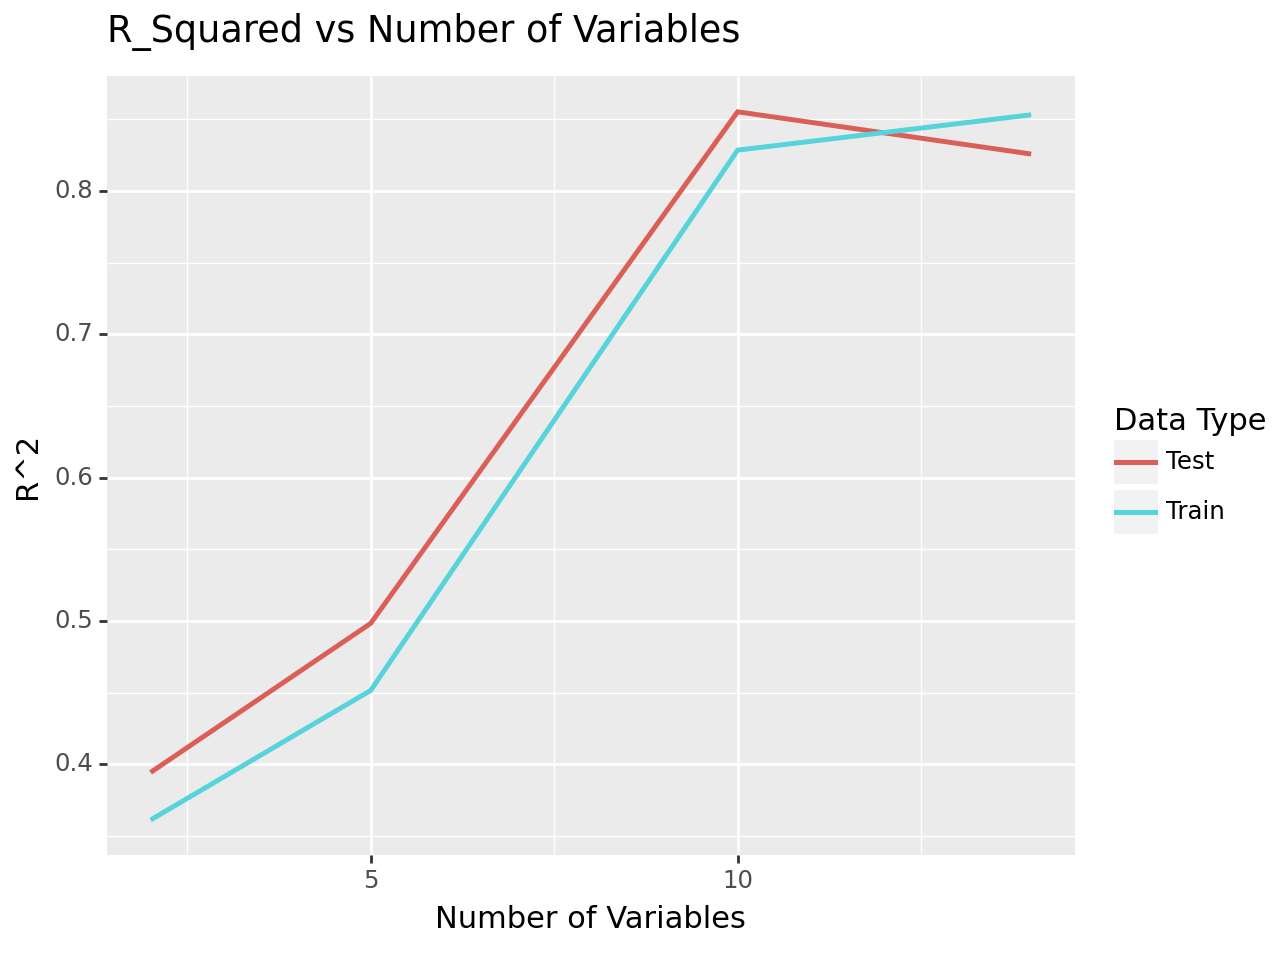

<Figure Size: (640 x 480)>

In [139]:
from plotnine import *
plot = (ggplot(df,aes(x='Number of Variables'))
+geom_smooth(aes(y='R^2 (Test Data)', color = "'Test'"), se = False)
+geom_smooth(aes(y='R^2 (Train Data)', color = "'Train'"), se = False)
+ labs(title="R_Squared vs Number of Variables", x="Number of Variables", y="R^2", color="Data Type")
)
plot